### How to perform web scraping with Python!

### Grabbing the title of a page

In [1]:
import requests

In [2]:
# Step 1: Use the requests library to grab the page
# Note, this may fail if you have a firewall blocking Python/Jupyter 
# Note sometimes you need to run this twice if it fails the first time
res = requests.get("https://www.ump.edu.my/en")

In [3]:
print(res)

<Response [200]>


In [4]:
type(res)

requests.models.Response

In [5]:
res.text

'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <meta charset="utf-8" />\n<script>(function(i,s,o,g,r,a,m){i["GoogleAnalyticsObject"]=r;i[r]=i[r]||function(){(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)})(window,document,"script","https://www.google-analytics.com/analytics.js","ga");ga("create", "UA-23032201-1", {"cookieDomain":"auto"});ga("set", "anonymizeIp", true);ga("send", "pageview");</script>\n<meta name="Generator" content="Drupal 8 (https://www.drupal.org)" />\n<meta name="MobileOptimized

Now we use BeautifulSoup to analyze the extracted page. Technically we could use our own custom script to loook for items in the string of res.text but the BeautifulSoup library already has lots of built-in tools and methods to grab information from a string of this nature (basically an HTML file). Using BeautifulSoup we can create a “soup” object that contains all the “ingredients” of the webpage.

In [6]:
import bs4

In [7]:
soup = bs4.BeautifulSoup(res.text,"lxml")

In [8]:
soup

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
<head>
<meta charset="utf-8"/>
<script>(function(i,s,o,g,r,a,m){i["GoogleAnalyticsObject"]=r;i[r]=i[r]||function(){(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)})(window,document,"script","https://www.google-analytics.com/analytics.js","ga");ga("create", "UA-23032201-1", {"cookieDomain":"auto"});ga("set", "anonymizeIp", true);ga("send", "pageview");</script>
<meta content="Drupal 8 (https://www.drupal.org)" name="Generator"/>
<meta content="width" name="MobileOptimize

In [9]:
soup.select('title')

[<title>UMPSA Frontpage | Official Portal - UMPSA Universiti Malaysia Pahang Al-Sultan Abdullah (Malaysia University) - Public University in Pahang</title>]

In [10]:
title_tag = soup.select('title')

In [11]:
title_tag[0]

<title>UMPSA Frontpage | Official Portal - UMPSA Universiti Malaysia Pahang Al-Sultan Abdullah (Malaysia University) - Public University in Pahang</title>

In [12]:
type(title_tag[0])

bs4.element.Tag

In [13]:
title_tag[0].getText()

'UMPSA Frontpage | Official Portal - UMPSA Universiti Malaysia Pahang Al-Sultan Abdullah (Malaysia University) - Public University in Pahang'

### Grabbing all the elements of a class

In [14]:
import bs4


# First get the request
res = requests.get('https://en.wikipedia.org/wiki/Data_mining')

In [15]:
# Create a soup from request
soup = bs4.BeautifulSoup(res.text,"lxml")

In [16]:
# note depending on your IP Address, 
# this class may be called something different
soup.select(".toctext")

[]

In [17]:
for item in soup.select(".toctext"):
    print(item.text)

### Getting an image from a website

In [18]:
res = requests.get("https://en.wikipedia.org/wiki/Extreme_ironing")

In [19]:
soup = bs4.BeautifulSoup(res.text,'lxml')

In [20]:
image_info = soup.select('.thumbimage')

In [21]:
image_info

[]

In [22]:
len(image_info)

0

In [23]:
our_image = image_info[0]

IndexError: list index out of range

In [ ]:
type(image_info)

In [24]:


our_image['src']

NameError: name 'our_image' is not defined

In [25]:

image_link = requests.get('http://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Extermeironingrivelin.jpg/220px-Extermeironingrivelin.jpg')

In [26]:
image_link

<Response [200]>

<img src='//upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Extermeironingrivelin.jpg/220px-Extermeironingrivelin.jpg'>

#### Get from the inspect element for image link.

<img src='//upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Extermeironingrivelin.jpg/220px-Extermeironingrivelin.jpg'>

#### Get from the inspect element for image link.

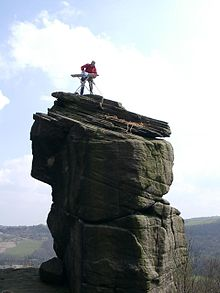

In [27]:
# The raw content (its a binary file, meaning we will need to use binary read/write methods for saving it)
# image_link.content

In [28]:
f = open('Extreme_ironing.jpg','wb')

In [29]:
f.write(image_link.content)

11033

In [30]:
f.close()

### Working with multiple pages and items

In [31]:
base_url = 'http://books.toscrape.com/catalogue/page-{}.html'

In [45]:
res = requests.get(base_url.format('1'))

In [46]:
soup = bs4.BeautifulSoup(res.text,"lxml")

In [47]:
products = soup.select(".product_pod")

In [48]:
example = products[0]

In [49]:
example

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [50]:
type(example)

bs4.element.Tag

In [51]:
example.attrs

{'class': ['product_pod']}

In [52]:
list(example.children)

['\n',
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>,
 '\n',
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>,
 '\n',
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>,
 '\n',
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>,
 '\n']

In [55]:
example.select('.star-rating.Three')

[<p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>]

In [64]:
example.select('.star-rating.Two')

[]

In [65]:
example.select('a')

[<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>,
 <a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]

In [66]:
example.select('a')[0]

<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>

In [67]:
example.select('a')[1]

<a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [68]:
example.select('a')[1]['title']

'A Light in the Attic'

In [69]:
two_star_titles = []

for n in range(1,51):

    scrape_url = base_url.format(n)
    res = requests.get(scrape_url)
    
    soup = bs4.BeautifulSoup(res.text,"lxml")
    books = soup.select(".product_pod")
    
    for book in books:
        if len(book.select('.star-rating.Two')) != 0:
            two_star_titles.append(book.select('a')[1]['title'])

ConnectionError: HTTPConnectionPool(host='books.toscrape.com', port=80): Max retries exceeded with url: /catalogue/page-2.html (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002908269F9D0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
two_star_titles